<a href="https://colab.research.google.com/github/Prateek-27/Breast-Cancer-Prediction/blob/master/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction using Numerical and Textual Analysis
Author: Prateek Sengar


Task assigned by The Sparks Foundation for my internship in Data Science & Business Analytics.  

Importing all the required libraries 

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pylab

from textblob import TextBlob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


# Loading data

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

#Headlines data
file_path = 'gdrive/My Drive/Colab Notebooks/india-news-headlines.csv'
headlines_data = pd.read_csv(file_path)


#TCS stock data
file_path = 'gdrive/My Drive/Colab Notebooks/TCS.csv'
stock_data = pd.read_csv(file_path)


 

Mounted at /content/gdrive


In [ ]:
print(headlines_data.head(5))
print(stock_data.head(5))

print("Missing values: ")
print("Is there any missing values in the headlines dataset? ",headlines_data.isnull().values.any())
print("Is there any missing values in the stock dataset? ", stock_data.isnull().values.any())

   publish_date  ...                                      headline_text
0      20010101  ...  win over cena satisfying but defeating underta...
1      20010102  ...  Status quo will not be disturbed at Ayodhya; s...
2      20010102  ...                Fissures in Hurriyat over Pak visit
3      20010102  ...              America's unwanted heading for India?
4      20010102  ...                 For bigwigs; it is destination Goa

[5 rows x 3 columns]
         Date Symbol Series  ...  Trades  Deliverable Volume  %Deliverble
0  2004-08-25    TCS     EQ  ...     NaN             5206360       0.3042
1  2004-08-26    TCS     EQ  ...     NaN             1294899       0.2561
2  2004-08-27    TCS     EQ  ...     NaN              976527       0.2549
3  2004-08-30    TCS     EQ  ...     NaN              701664       0.2294
4  2004-08-31    TCS     EQ  ...     NaN              695234       0.2624

[5 rows x 15 columns]
Missing values: 
Is there any missing values in the headlines dataset?  False
I

In [ ]:
stock_data = stock_data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Trades']]

In [ ]:
print(stock_data)

            Date    Open     High      Low    Close    Volume    Trades
0     2004-08-25  1198.7  1198.70   979.00   987.95  17116372       NaN
1     2004-08-26   992.0   997.00   975.30   979.00   5055400       NaN
2     2004-08-27   982.4   982.40   958.55   962.65   3830750       NaN
3     2004-08-30   969.9   990.00   965.00   986.75   3058151       NaN
4     2004-08-31   986.5   990.00   976.00   988.10   2649332       NaN
...          ...     ...      ...      ...      ...       ...       ...
4032  2020-11-23  2690.0  2730.00  2665.00  2724.25   3706418  150378.0
4033  2020-11-24  2734.4  2743.00  2705.00  2722.05   3120516  148092.0
4034  2020-11-25  2729.0  2732.95  2688.20  2701.30   3302249  163422.0
4035  2020-11-26  2686.0  2730.95  2680.00  2720.60   2341099  103635.0
4036  2020-11-27  2705.0  2717.70  2669.05  2679.65   6086808  168842.0

[4037 rows x 7 columns]


# Dealing with missing values in the stock dataset (Preprocessing)


In [ ]:
# Checking columns with missing data 
print(stock_data.isna().sum())
print("Number of missing values in stock dataset = ", stock_data.isnull().values.sum())

# Filling the Trades column's missing values with the mean value
stock_data['Trades'].fillna((stock_data["Trades"].mean()), inplace = True)



Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Trades    1683
dtype: int64
Number of missing values in stock dataset =  1683


In [ ]:
# Checking again for columns with missing data 
print(stock_data.isna().sum())
print("Number of missing values in stock dataset = ", stock_data.isnull().values.sum())


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Trades    0
dtype: int64
Number of missing values in stock dataset =  0


# Plotting the graph for visual representation of how the stock performed over the years

Text(0.5, 1.0, 'TCS Stock Price 2004 - 2020')

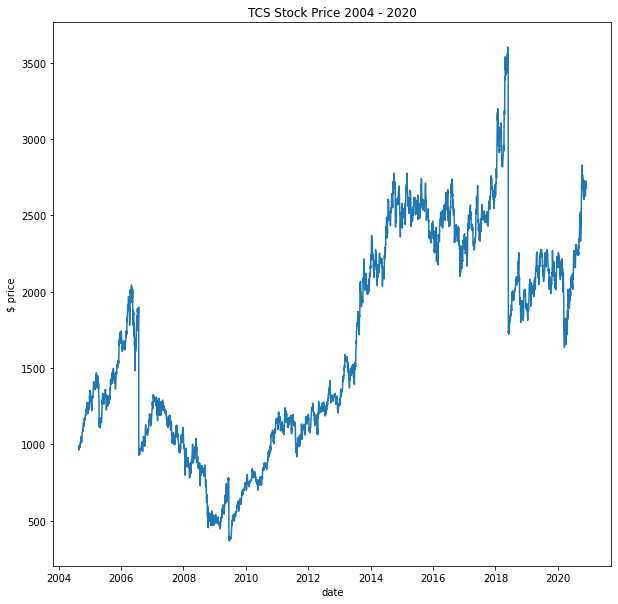

In [ ]:
plt.figure(figsize=(10,10))
stock_data.index = pd.to_datetime(stock_data['Date'], format='%Y-%m-%d')
plt.plot(stock_data.index, stock_data['Close'])
plt.xlabel("date")
plt.ylabel("$ price")
plt.title("TCS Stock Price 2004 - 2020")

# Sentiment Analysis

Calculating polarity scores according to the dates

In [ ]:
def polarity_scores(text):
  blob = TextBlob(text)
  return blob.sentiment.polarity

In [ ]:
dates = headlines_data.publish_date.unique()

dates_stock_data = stock_data.Date
#print(dates_stock_data)
polarity_scores_lst = []
dates_lst = []

for date in dates:
  date_for_lst = str(date)[:4]+"-"+str(date)[4:6]+"-"+str(date)[6:8]
  if date_for_lst in dates_stock_data:
    dates_lst.append(date_for_lst)
    df = pd.DataFrame(headlines_data.loc[headlines_data['publish_date'] == date, 'headline_text'])
    headlines = ""
    for index, row in df.iterrows():
      headlines+=row['headline_text']+", "
    score = polarity_scores(headlines)
    polarity_scores_lst.append(score) 

In [ ]:
print(dates_lst)

['2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30', '2004-08-31', '2004-09-01', '2004-09-02', '2004-09-03', '2004-09-06', '2004-09-07', '2004-09-08', '2004-09-09', '2004-09-10', '2004-09-13', '2004-09-14', '2004-09-15', '2004-09-16', '2004-09-17', '2004-09-20', '2004-09-21', '2004-09-22', '2004-09-23', '2004-09-24', '2004-09-27', '2004-09-28', '2004-09-29', '2004-09-30', '2004-10-01', '2004-10-04', '2004-10-05', '2004-10-06', '2004-10-07', '2004-10-08', '2004-10-09', '2004-10-11', '2004-10-12', '2004-10-14', '2004-10-15', '2004-10-18', '2004-10-19', '2004-10-20', '2004-10-21', '2004-10-25', '2004-10-26', '2004-10-27', '2004-10-28', '2004-10-29', '2004-11-01', '2004-11-02', '2004-11-03', '2004-11-04', '2004-11-05', '2004-11-08', '2004-11-09', '2004-11-10', '2004-11-11', '2004-11-12', '2004-11-16', '2004-11-17', '2004-11-18', '2004-11-19', '2004-11-22', '2004-11-23', '2004-11-24', '2004-11-25', '2004-11-29', '2004-11-30', '2004-12-01', '2004-12-02', '2004-12-03', '2004-12-06', '2004

In [ ]:
print(polarity_scores_lst)

[0.04141250163977438, 0.05548828155971015, 0.07301281448020579, 0.0931286754531618, 0.0789616921889118, 0.0815886544011544, 0.09507735464766719, 0.024301674648623456, 0.05832776619813655, 0.05346989054306127, 0.03140175338288545, 0.1514674059356895, -0.017270359848484833, 0.14049786732874972, 0.09803059752039348, 0.053777895231383606, 0.0615426783361566, 0.08094602682670869, 0.05908481430849852, 0.0793396529842313, 0.13068991193991195, 0.07534924461060825, 0.0898376183437159, 0.06646103896103896, 0.07985119047619046, 0.057493106208859626, 0.03802854122621564, 0.00866049783549784, 0.06744214354383844, 0.15976152502468294, 0.06739130434782609, 0.09002030104971281, 0.08254498106060605, 0.05821100442111079, 0.07269554791613615, 0.027180277349768866, 0.05047370662124761, -0.013164928505837599, 0.11675987278028094, 0.02561857643490296, 0.10037133759959847, 0.03354593948856243, 0.025951615724343, -0.0029829545454545556, -0.05108030108030109, 0.09457218286763741, 0.07291181908369408, 0.1346881

In [ ]:
new_dataset = pd.DataFrame()
new_dataset['Date'] = dates_lst
new_dataset['Polarity_score'] = polarity_scores_lst
print(new_dataset.head())
print(new_dataset.shape)


         Date  Polarity_score
0  2004-08-25        0.041413
1  2004-08-26        0.055488
2  2004-08-27        0.073013
3  2004-08-30        0.093129
4  2004-08-31        0.078962
(3930, 2)


In [ ]:
stock_data.index.name = None
stock_data = stock_data.rename_axis(None)

Final Dataset

In [ ]:
df = pd.merge(new_dataset, stock_data, on='Date', how='left')
df['Date'] = pd.to_datetime(df['Date'])
print(df)

           Date  Polarity_score    Open  ...    Close    Volume         Trades
0    2004-08-25        0.041413  1198.7  ...   987.95  17116372   82412.390399
1    2004-08-26        0.055488   992.0  ...   979.00   5055400   82412.390399
2    2004-08-27        0.073013   982.4  ...   962.65   3830750   82412.390399
3    2004-08-30        0.093129   969.9  ...   986.75   3058151   82412.390399
4    2004-08-31        0.078962   986.5  ...   988.10   2649332   82412.390399
...         ...             ...     ...  ...      ...       ...            ...
3925 2020-06-24        0.088329  2034.0  ...  2042.20   2560951  125500.000000
3926 2020-06-25        0.027038  2035.0  ...  2016.10   3044089  127554.000000
3927 2020-06-26        0.068333  2025.0  ...  2118.85   6300912  237429.000000
3928 2020-06-29        0.061956  2108.0  ...  2101.65   3076344  109993.000000
3929 2020-06-30        0.071554  2100.0  ...  2082.15   3071877  121691.000000

[3930 rows x 8 columns]


# Prediction

Creating Prediction models

In [ ]:
#Split the data into independent 'X' and dependent 'Y' variables
df_new = df.drop('Date', axis=1)

X = df_new.loc[:, df_new.columns != 'Close'].values
Y = df_new.iloc[:, 4].values 


Note: We will consider the close price of the stock as our target variable as the profit and loss calculations are determined by the close price. 

In [ ]:
# Split the dataset into 75% Training set and 25% Testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
#Sclaing (used to normalize the range of independent variables) data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  #Using SGDRegressor for Training 
  sgd = SGDRegressor()
  sgd.fit(X_train, Y_train)

  #Using RandomForestRegressor Training 
  rfr = RandomForestRegressor()
  rfr.fit(X_train, Y_train)
  
  return sgd, rfr

model = models(X_train,Y_train)

In [ ]:
#Prediction using SGDRegressor
Y_pred = model[0].predict(X_test)
print("Accuracy of SGDRegressor:",model[0].score(X_test, Y_test))


Accuracy of SGDRegressor: 0.9994024493842146


In [ ]:
#Prediction using RandomForestRegressor
Y_pred = model[1].predict(X_test)
print("Accuracy of RandomForestRegressor:",model[1].score(X_test, Y_test))


Accuracy of RandomForestRegressor: 0.9995810951434956


In [ ]:
print("First 20 predictions on the test data: ")
print(Y_pred[:20])

First 20 predictions on the test data: 
[1052.4815  481.017  1176.51   1217.459  1826.77   2578.9755  859.7695
 2548.1645 1976.425  1233.559  2345.175  2506.7595  472.5415 2581.3095
 1308.117  1258.7375 2597.2475  963.1375 2252.6925 2214.6145]


[]

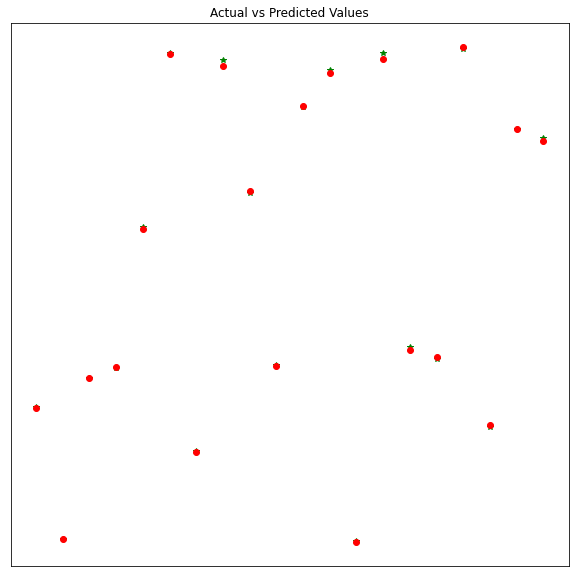

In [ ]:
Y_pred = model[1].predict(X_test)
fig = plt.figure(figsize=(10,10))
plt.title('Actual vs Predicted Values')
plt.plot(Y_pred[:20],'g*', Y_test[:20], 'ro')

frame = pylab.gca()
frame.axes.get_xaxis().set_ticks([])
frame.axes.get_yaxis().set_ticks([])
